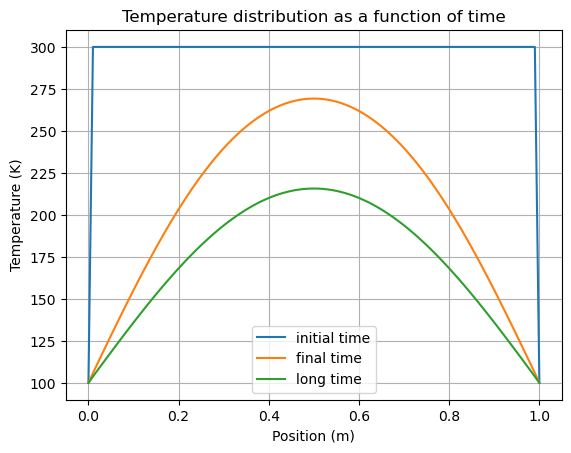

In [2]:
#Q1

import numpy as np
import matplotlib.pyplot as plt

def solve_by_thomas_algorithm(a, b, c, d):
    """
    Solve a tridiagonal system Ax = d using the Thomas algorithm.
    a, b, c are the lower, main, and upper diagonals (1D arrays).
    d is the right-hand side array.
    Returns the solution array x.
    """
    N = len(b)
    cp = np.zeros(N)
    dp = np.zeros(N)
    x = np.zeros(N)
   
    cp[0] = c[0] / b[0]
    dp[0] = d[0] / b[0]
   
    for i in range(1, N):
        bp = b[i] - a[i] * cp[i - 1]
        dp[i] = (d[i] - a[i] * dp[i - 1]) / bp
        if i < N - 1:
            cp[i] = c[i] / bp
   
    x[-1] = dp[-1]
    for i in range(N - 2, -1, -1):
        x[i] = dp[i] - cp[i] * x[i + 1]
   
    return x

def solve_heat_equation(params):
    """
    Solve the 1D heat equation using the Crank-Nicolson method with the Thomas algorithm.
    params = (alpha, L, Nx, Nt, dt, u_boundary, u_ini, r)
   
    alpha -> Thermal diffusivity
    L -> Length of the domain
    Nx -> Number of spatial grid points
    Nt -> Number of time steps
    dt -> Time step size
    u_boundary -> Tuple (u_left, u_right) for Dirichlet BCs
    u_ini -> Initial temperature profile (1D numpy array of length Nx)
    r -> alpha * dt / (dx^2)
   
    Returns:
    ts -> 1D array of time values
    solutions -> 2D array of shape (Nx, Nt+1),
    where solutions[:, k] is the solution at time step k.
    """
    alpha, L, Nx, Nt, dt, u_boundary, u_ini, r = params
    u = np.copy(u_ini)
    dx = L / (Nx - 1)
    ts = np.linspace(0, Nt * dt, Nt + 1)
    solutions = np.zeros((Nx, Nt + 1))
   
    for k in range(Nt):
        solutions[:, k] = u
       
        d = np.zeros(Nx)
        for i in range(Nx):
            d[i] = (1 - r) * u[i]
            if i > 0:
                d[i] += (r / 2) * u[i - 1]
            if i < Nx - 1:
                d[i] += (r / 2) * u[i + 1]
       
        d[0] += r * u_boundary[0]
        d[-1] += r * u_boundary[1]
       
        b = (1 + r) * np.ones(Nx)
        a = np.zeros(Nx)
        c = np.zeros(Nx)
        a[1:] = -r / 2
        c[:-1] = -r / 2
       
        u = solve_by_thomas_algorithm(a, b, c, d)
        u[0], u[-1] = u_boundary
       
    solutions[:, Nt] = u
    return ts, solutions

# Parameters
alpha = 1.0e-4
L = 1.0
Nx = 101
Nt = 8000
dt = 0.1
#sigma = 0.05
u_boundary = (100.0, 100.0)
dx = L / (Nx - 1)
r = alpha * dt / (dx * dx)
xs = np.linspace(0, L, Nx)

# Initial condition: 
u_ini =  np.zeros(Nx)
u_ini[0] = u_boundary[0]
u_ini[-1] = u_boundary[1]
for i in range(1,Nx-1):
    u_ini[i] = 300
 

# Solve the heat equation
params = (alpha, L, Nx, Nt, dt, u_boundary, u_ini, r)
ts, solutions = solve_heat_equation(params)

# Plot results
plt.plot(xs, solutions[:,0], label='initial time')
plt.plot(xs, solutions[:,int(Nt/2)],label='final time')
plt.plot(xs, solutions[:,-1],label='long time')
# plt.legend([f't={t:.1f}' for t in ts[::400]])
plt.title("Temperature distribution as a function of time")
plt.xlabel("Position (m)")
plt.ylabel("Temperature (K)")
plt.legend()
plt.grid()
plt.show()

from this graph, we can say that for t --> 0 limit , it will approach the 100K uniform temp over for all the x (that is, over all the Rod)

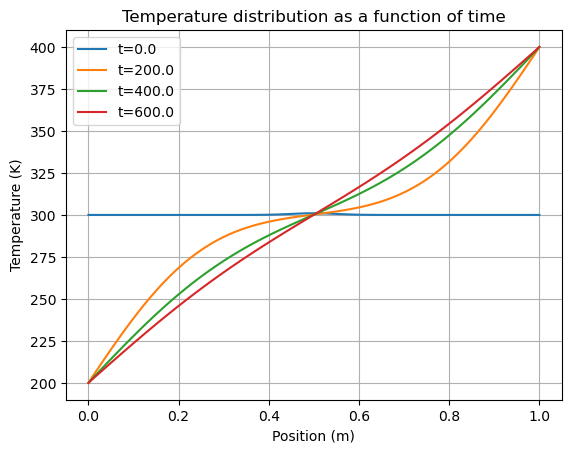

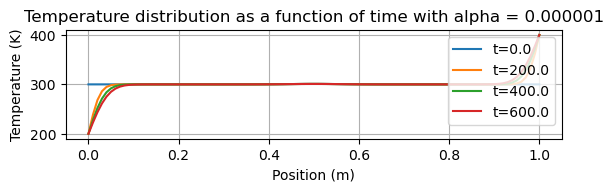

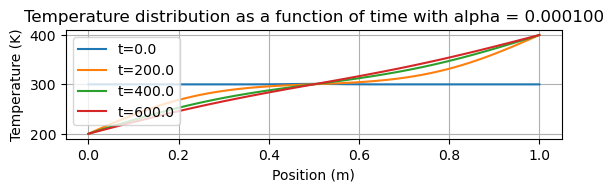

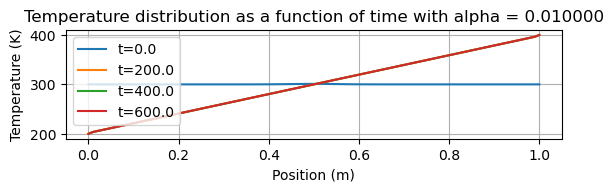

In [68]:
#Q2

import numpy as np
import matplotlib.pyplot as plt

def solve_by_thomas_algorithm(a, b, c, d):
    """
    Solve a tridiagonal system Ax = d using the Thomas algorithm.
    a, b, c are the lower, main, and upper diagonals (1D arrays).
    d is the right-hand side array.
    Returns the solution array x.
    """
    N = len(b)
    cp = np.zeros(N)
    dp = np.zeros(N)
    x = np.zeros(N)
   
    cp[0] = c[0] / b[0]
    dp[0] = d[0] / b[0]
   
    for i in range(1, N):
        bp = b[i] - a[i] * cp[i - 1]
        dp[i] = (d[i] - a[i] * dp[i - 1]) / bp
        if i < N - 1:
            cp[i] = c[i] / bp
   
    x[-1] = dp[-1]/1
    for i in range(N - 2, -1, -1):
        x[i] = (dp[i] - cp[i] * x[i + 1])/1
   
    return x

def solve_heat_equation(params):
    """
    Solve the 1D heat equation using the Crank-Nicolson method with the Thomas algorithm.
    params = (alpha, L, Nx, Nt, dt, u_boundary, u_ini, r)
   
    alpha -> Thermal diffusivity
    L -> Length of the domain
    Nx -> Number of spatial grid points
    Nt -> Number of time steps
    dt -> Time step size
    u_boundary -> Tuple (u_left, u_right) for Dirichlet BCs
    u_ini -> Initial temperature profile (1D numpy array of length Nx)
    r -> alpha * dt / (dx^2)
   
    Returns:
    ts -> 1D array of time values
    solutions -> 2D array of shape (Nx, Nt+1),
    where solutions[:, k] is the solution at time step k.
    """
    alpha, L, Nx, Nt, dt, u_boundary, u_ini, r = params
    u = np.copy(u_ini)
    dx = L / (Nx - 1)
    ts = np.linspace(0, Nt * dt, Nt + 1)
    solutions = np.zeros((Nx, Nt + 1))
       
    for k in range(Nt):
        solutions[:, k] = u
       
        d = np.zeros(Nx)
        for i in range(Nx):
            d[i] = (1 - r) * u[i]
            if i > 0:
                d[i] += (r / 2) * u[i - 1]
            if i < Nx - 1:
                d[i] += (r / 2) * u[i + 1]
       
        d[0] += r * u_boundary[0]
        d[-1] += r * u_boundary[1]
       
        b = (1 + r) * np.ones(Nx)
        a = np.zeros(Nx)
        c = np.zeros(Nx)
        a[1:] = -r / 2
        c[:-1] = -r / 2
       
        u = solve_by_thomas_algorithm(a, b, c, d)
        u[0], u[-1] = u_boundary
       
    solutions[:, Nt] = u
    return ts, solutions

# Parameters
alpha = 1.0e-4
L = 1.0
#Nx = np.array([101,601,1201])
Nx = 101 
Nt = 6000
#dt = np.array([10,0.1,0.001])
dt = 0.1
sigma = 0.05
u_boundary = (200.0, 400.0)
dx = L / (Nx - 1)
r = alpha * dt / (dx * dx)
xs = np.linspace(0, L, Nx)

# Initial condition: Gaussian bump over 300 K
u_ini =   300 + np.exp(-((xs-L/2)**2)/(2*(sigma**2)))

# Solve the heat equation
params = (alpha, L, Nx, Nt, dt, u_boundary, u_ini, r)
ts, solutions = solve_heat_equation(params)

# Plot results
plt.plot(xs, solutions[:,::2000])
# plt.plot(xs, solutions[:,int(Nt/2)],label='final time =')
# plt.plot(xs, solutions[:,-1],label='long time')
plt.legend([f't={t:.1f}' for t in ts[::2000]])
plt.title("Temperature distribution as a function of time")
plt.xlabel("Position (m)")
plt.ylabel("Temperature (K)")
# plt.legend()
#plt.ylim(299,302)
plt.grid()
plt.show()

# variation in alpha
alpha = np.array([1e-6,1e-4,1e-2])
for alpha in alpha:
    i=1
    r = alpha * dt / (dx * dx)
    params = (alpha, L, Nx, Nt, dt, u_boundary, u_ini, r)
    ts, solutions = solve_heat_equation(params)
    # Plot results
    plt.subplot(3,1,i)
    plt.plot(xs, solutions[:,::2000])
    # plt.plot(xs, solutions[:,int(Nt/2)],label='final time')
    # plt.plot(xs, solutions[:,-1],label='long time')
    plt.legend([f't={t:.1f}' for t in ts[::2000]])
    plt.title(f"Temperature distribution as a function of time with alpha = {alpha:.6f}")
    plt.xlabel("Position (m)")
    plt.ylabel("Temperature (K)")
    # plt.legend()
    #plt.ylim(299,302)
    plt.grid()
    plt.show()
    i +=1

it can be seen from above graph, for a long run, linear steady state has been achieved.